In [1]:
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
h, npoints = 0.1, 10000
phi_min, phi_max = 0, 20*np.pi

phi = np.linspace(phi_min, phi_max, npoints)
x, y, z = np.cos(phi), np.sin(phi), h*(1+0.1 * phi) * phi

In [3]:
x.shape, y.shape, z.shape

((10000,), (10000,), (10000,))

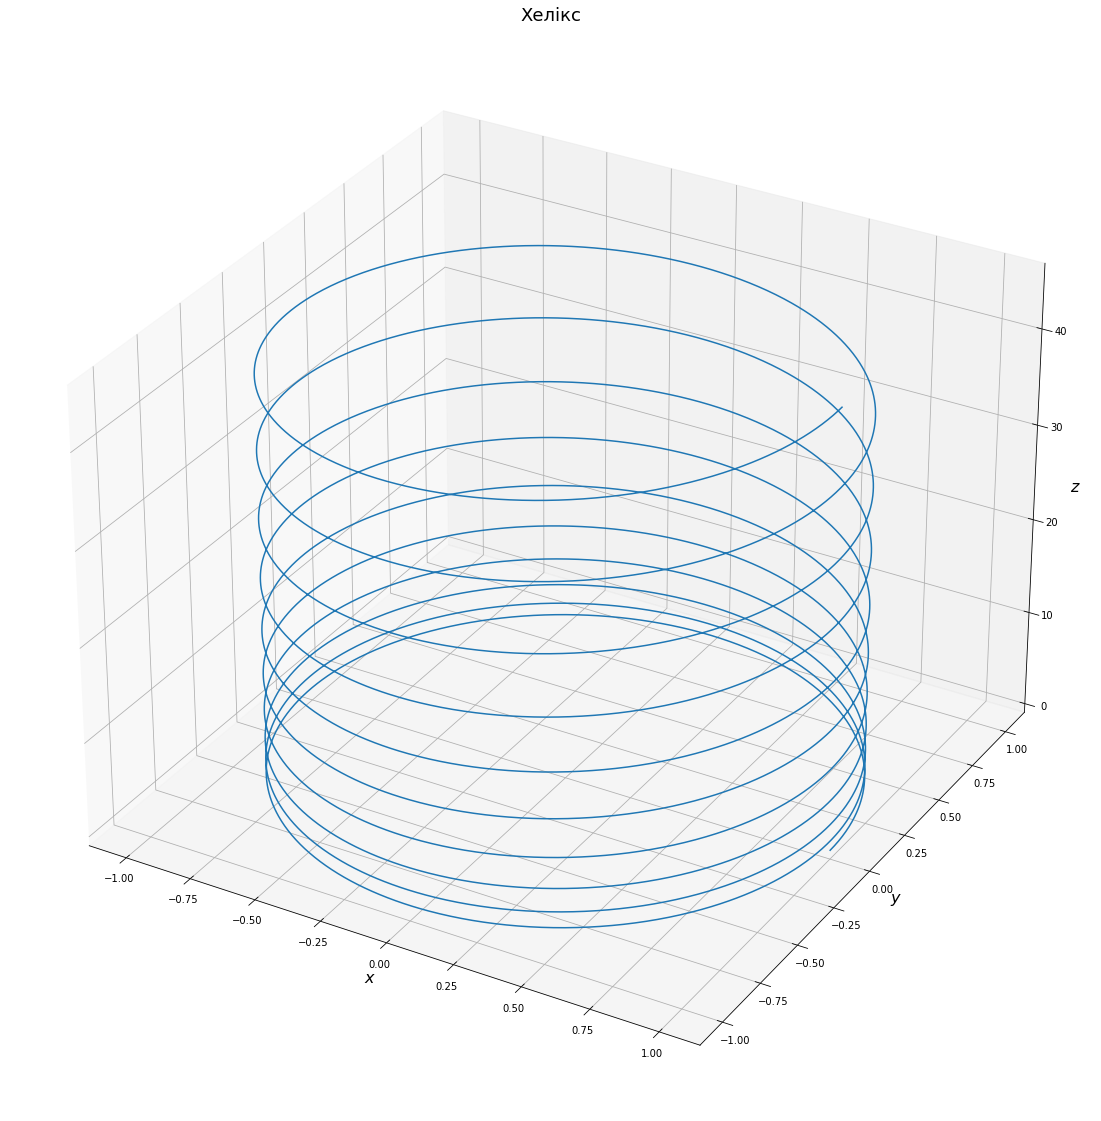

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20), 
                         subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)
    
ax.plot(x, y, z)
title_and_labels(ax, 'Хелікс')

In [5]:
A = lambda phi: 1 + h ** 2 * (1 + 0.2 * phi) ** 2
B = lambda phi: 0.4 * h ** 2 * (1 + 0.2 * phi)
C = lambda phi: 0.2 * h * A(phi) - h * (1  + 0.2 * phi) * B(phi)

In [6]:
def K(phi):
    return np.sqrt(A(phi) ** 2 + B(phi) ** 2 + C(phi) ** 2) /\
           A(phi) ** 2

In [7]:
D = lambda phi: C(phi) * np.cos(phi) + h * (1 + 0.2 * phi) * \
                (A(phi) * np.sin(phi) + B(phi) * np.cos(phi))

E = lambda phi: C(phi) * np.cos(phi) + h * (1 + 0.2 * phi) * \
                (B(phi) * np.sin(phi) - A(phi) * np.cos(phi))

In [8]:
B_dot = lambda phi: 0.08*h**2
C_dot = lambda phi: h * (1 + 0.2*phi) * B_dot(phi)

In [9]:
def T(phi):
    return 1 / (A(phi) * (A(phi)**2 + B(phi)**2 + C(phi)**2)) * \
            (A(phi) * C_dot(phi) + (A(phi) + B_dot(phi)) * \
            (D(phi) * np.sin(phi) - E(phi) * np.cos(phi)))

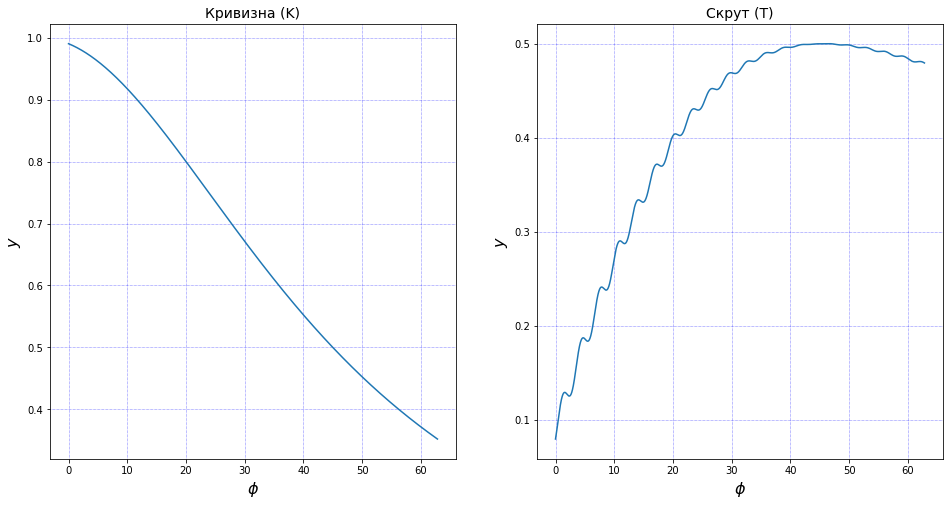

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

def title_and_labels(ax, title):
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("$\phi$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.grid(color='blue', which='both', 
            linestyle=':', linewidth=0.5)


k_values = K(phi)
axes[0].plot(phi, k_values)
title_and_labels(axes[0], 'Кривизна (K)')

t_values = T(phi)
axes[1].plot(phi, t_values)
title_and_labels(axes[1], 'Скрут (T)')